<a href="https://colab.research.google.com/github/ShamamaFirdaus/ShamamaFirdaus/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#objective:survival rate
t = pd.read_csv('titanic.csv')

In [ ]:
t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
t.shape

(891, 12)

In [ ]:
#null values
t.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#cabin
n = 687/891*100
print(n,'% of the data in cabin is missing and it is not much imp for the analysis')
print('delete the column cabin')

77.10437710437711 % of the data in cabin is missing and it is not much imp for the analysis
delete the column cabin


In [ ]:
t.drop(['Cabin'],axis=1,inplace=True)      #removing column cabin(axis=1 refers to the column)

In [ ]:
t.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [ ]:
t['Age'].median()      #using mean here gives float values

28.0

In [ ]:
t['Age'].fillna(28,inplace=True)

In [ ]:
t.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [ ]:
t['Embarked'].mode()     #as embarked is categorical,the most frequent value can be used

0    S
Name: Embarked, dtype: object

In [ ]:
t['Embarked'].fillna('S',inplace=True)

In [ ]:
t.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
#duplicate data
t.drop_duplicates()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [ ]:
#wrong data format
t.info()           #object refer to string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
#age should be int here
t['Age'] = t['Age'].astype('int',copy=False)

In [ ]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 76.7+ KB


In [ ]:
#outliers
#there are outliers in age and fare...but they are not the false outliers.so we cant replace them.

<ipython-input-20-623498ad5885>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(t.corr(),annot=True)


<Axes: >

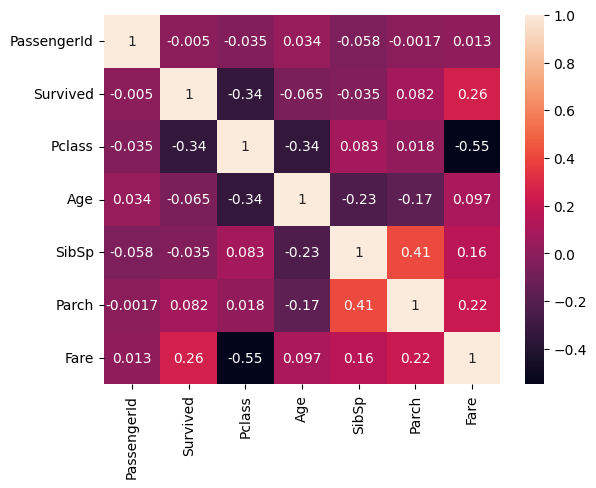

In [ ]:
sns.heatmap(t.corr(),annot=True)

In [ ]:
t['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

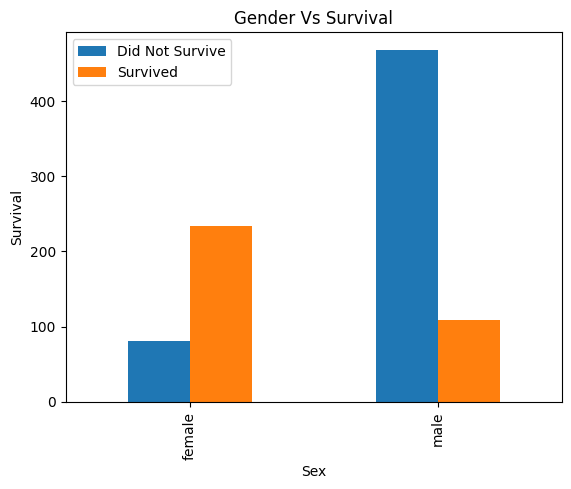

In [ ]:
gndr = t.groupby('Sex')['Survived'].value_counts().unstack()    #both the columns here should be categorical
gndr.plot(kind='bar')
plt.title("Gender Vs Survival")
plt.ylabel("Survival")
plt.legend(['Did Not Survive','Survived'])

In [ ]:
#Insights:The survival rate of female is more than male even though the number of female are less.

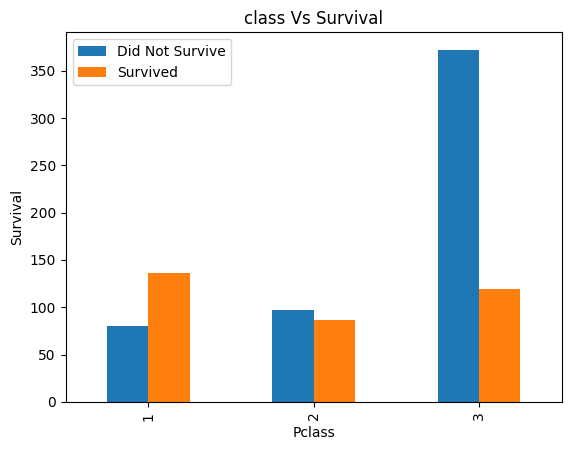

In [ ]:
clas = t.groupby('Pclass')['Survived'].value_counts().unstack()
clas.plot(kind='bar')
plt.title("class Vs Survival")
plt.ylabel("Survival")
plt.legend(['Did Not Survive','Survived'])

In [ ]:
#Insights:Survival rate of class 1 is more even though the no. of people in class 1 are less compared to class 2 and 3

In [ ]:
t.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [ ]:
#age is numerical data. to group it with survived ,we need it to be categorical
#so mAKE the age categorical by taking a range and make a new column

In [ ]:
age_bins = [0,10,20,30,40,50,60,70,80]
age_labels = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80']
t['age_group'] = pd.cut(t['Age'],bins=age_bins,labels=age_labels)

In [ ]:
t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,20-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,30-40
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,20-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,30-40
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,30-40


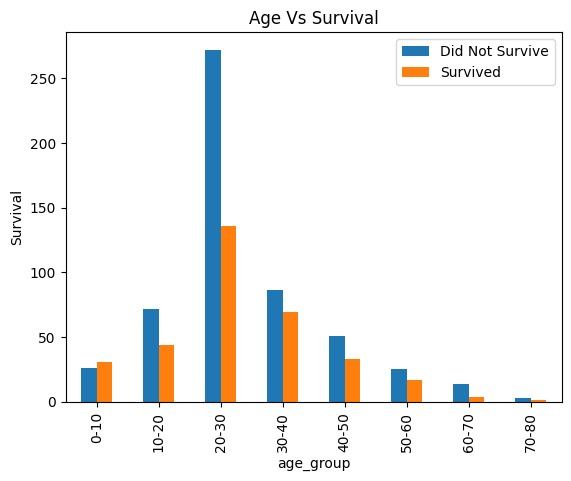

In [ ]:
age = t.groupby('age_group')['Survived'].value_counts().unstack()
age.plot(kind='bar')
plt.title("Age Vs Survival")
plt.ylabel("Survival")
plt.legend(['Did Not Survive','Survived'])

In [ ]:
#Insights:The survival rate of children b/w 0-10yrs is more

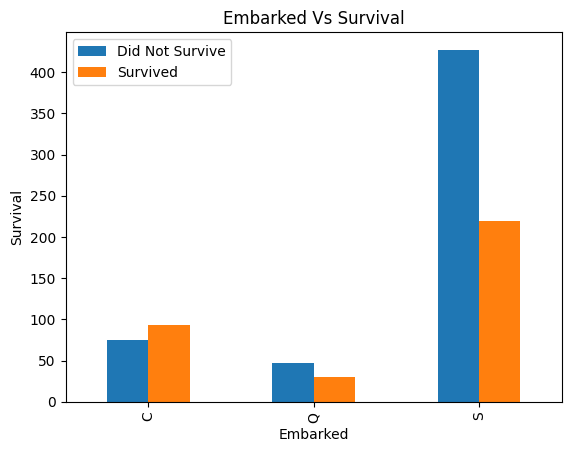

In [ ]:
city = t.groupby('Embarked')['Survived'].value_counts().unstack()
city.plot(kind='bar')
plt.title("Embarked Vs Survival")
plt.ylabel("Survival")
plt.legend(['Did Not Survive','Survived'])

In [ ]:
#fare is numerical data

<ipython-input-41-5a011b6b316a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(t['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

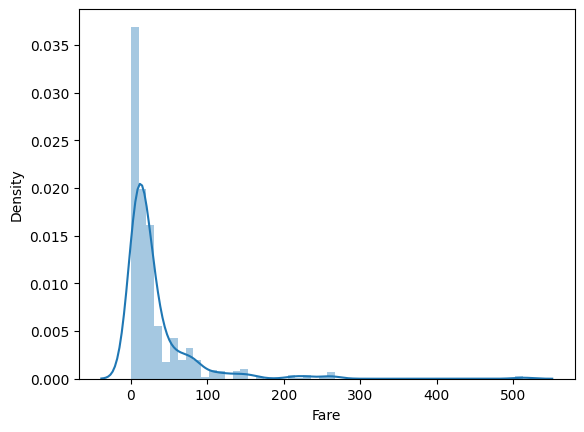

In [ ]:
sns.distplot(t['Fare'])

In [ ]:
# majority price is in range of 0 to approx 160

In [ ]:
newfare = t[t['Fare']<=180]

In [ ]:
newfare.shape

(871, 12)

In [ ]:
price_bins = [0,20,40,60,80,100,120,140,160]
price_labels = ['0-20','20-40','40-60','60-80','80-100','100-120','120-140','140-160']
newfare['price'] = pd.cut(newfare['Fare'],bins=price_bins,labels=price_labels)

<ipython-input-47-cd3746c017fe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newfare['price'] = pd.cut(newfare['Fare'],bins=price_bins,labels=price_labels)


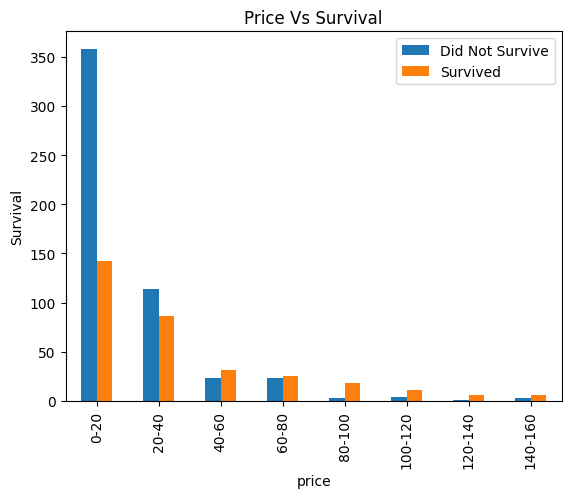

In [ ]:
pricee = newfare.groupby('price')['Survived'].value_counts().unstack()
pricee.plot(kind='bar')
plt.title("Price Vs Survival")
plt.ylabel("Survival")
plt.legend(['Did Not Survive','Survived'])